# Noise reduction on event data

In this notebook , we will demonstrate the application of both common and event-specific noise reduction techniques. We will vizualize some results and compare different methods to maximize the effectiveness of the noise reduction feature, which is specifically designed for event data.

<br>

***

# FFT

The FFT (Fast Fourier Transform) algorithm is a widely used mathematical technique for efficiently computing the discrete Fourier transform (DFT) of a sequence or signal. It is particularly useful in various fields such as signal processing, image processing, audio analysis, and data compression.

The DFT is a mathematical operation that transforms a time-domain signal into its frequency-domain representation. It decomposes a signal into its constituent frequencies, revealing the amplitude and phase information of each frequency component. This is valuable for analyzing and manipulating signals in the frequency domain.

The FFT algorithm is an optimized implementation of the DFT that significantly reduces the computational complexity from O(n^2) to O(n log n), where n is the size of the input sequence. This makes it much faster and more efficient for processing large amounts of data.

The key idea behind the FFT algorithm is to exploit the symmetry and periodicity properties of the complex exponential functions used in the DFT calculation. By recursively dividing the input sequence into smaller subproblems and combining the results, the FFT algorithm achieves a significant reduction in the number of arithmetic operations required.

In practical terms, the FFT algorithm allows us to efficiently analyze signals and extract useful information in various applications. It enables us to perform tasks such as spectral analysis, filtering, convolution, correlation, and many others. Its speed and efficiency make it an essential tool in modern digital signal processing.

Overall, the FFT algorithm is a powerful mathematical technique that revolutionized the field of signal processing by providing a fast and efficient way to analyze and manipulate signals in the frequency domain. Its widespread use and impact can be seen in numerous applications across various domains.

Fast Fourier Transform (FFT) can be effectively used for noise reduction in event data. The FFT algorithm transforms the time-domain signal into its frequency-domain representation, which allows us to analyze the signal in terms of its frequency components. Noise often manifests as high-frequency components in this domain. By identifying and zeroing out these high-frequency components (a process known as "filtering"), we can reduce the noise in the signal. After filtering, an inverse FFT is performed to transform the signal back to the time domain, resulting in a denoised version of the original signal. This technique is particularly useful in event data where noise can interfere with the detection and analysis of the events of interest.

In [24]:

def fft_denoise(event_df_col, alpha = 0.05):
    
    ''' 
    
    This function takes in a dataframe and a column name, and returns a denoised version of the column.
    
    Inputs:
    event_df_col: column of the dataframe to be denoised
    alpha: fraction of coefficients to be zeroed out
    
    Output:
    denoised_data: denoised version of the column
    
    '''
    
    
    import numpy as np

    fft_result = np.fft.fft(event_df_col)

    # To remove noise, you might zero out the smaller coefficients in the spectrum
    # Here we zero out all coefficients but the largest 5%
    threshold = np.percentile(np.abs(fft_result),  100*(1-alpha))
    fft_result[np.abs(fft_result) < threshold] = 0

    # Then, do an inverse FFT to get the denoised data
    denoised_data = np.fft.ifft(fft_result)
    
    return denoised_data.real  # use .real to get the real part of the complex numbers

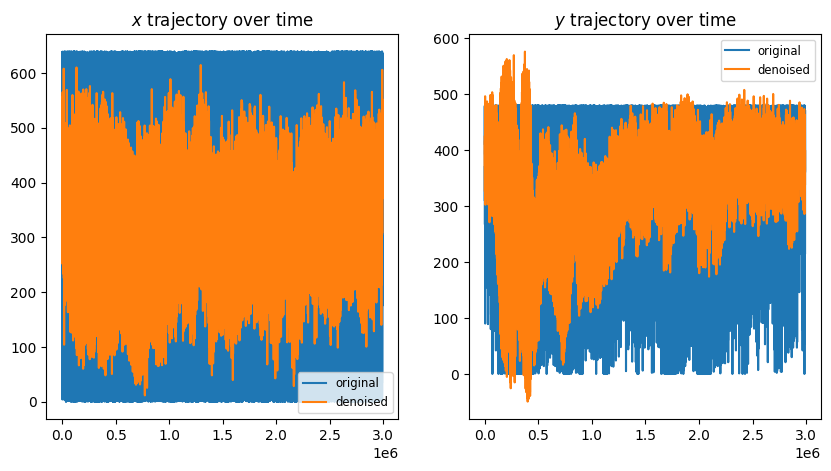

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = ['x', 'y', 'p', 't']
test_event_df = pd.read_csv('train10/train10/Addition/0.csv', header=None, names=column_names)

x = test_event_df['x']
denoised_x = fft_denoise(x)

y = test_event_df['y']
denoised_y = fft_denoise(y)

t = test_event_df['t']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create two subplots side by side

# Plot for x over time
axs[0].plot(t, x, label='original')
axs[0].plot(t, denoised_x, label='denoised')
axs[0].set_title('$x$ trajectory over time')
axs[0].legend(fontsize='small')

# Plot for y over time
axs[1].plot(t, y, label='original')
axs[1].plot(t, denoised_y, label='denoised')
axs[1].set_title('$y$ trajectory over time')
axs[1].legend(fontsize='small')

plt.show()